# Factorial experiment for HPL on Dahu

In [1]:
import io
import zipfile
import pandas
import matplotlib
%matplotlib inline
archive = zipfile.ZipFile('grenoble_2018-08-13_1808214.zip')
df = dataframe = pandas.read_csv(io.BytesIO(archive.read('results.csv')))
print(len(df))
df['index'] = range(len(df))
df['topo'] = df.proc_p.astype(str) + '*' + df.proc_q.astype(str)
df.head()

3888


,pfact,time,swap,bcast,rfact,residual,proc_p,block_size,depth,matrix_size,proc_q,mem_align,gflops,index,topo
0,1,5.88,2,4,0,0.001419,16,128,1,32768,32,4,3991.0,0,16*32
1,1,7.13,2,0,2,0.001976,16,512,0,32768,32,8,3289.0,1,16*32
2,2,7.04,1,3,1,0.001994,16,512,0,32768,32,8,3331.0,2,16*32
3,0,4.90,2,0,2,0.001419,16,128,0,32768,32,8,4787.0,3,16*32
4,2,5.35,2,0,0,0.001280,32,128,0,32768,16,4,4383.0,4,32*16


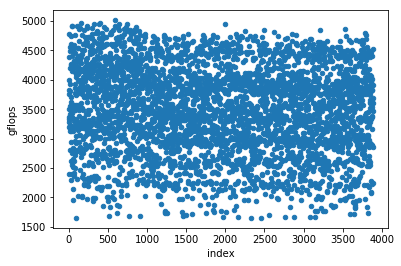

In [2]:
df.plot.scatter(x='index', y='gflops')

In [3]:
factors = list(df.columns)
for fact in ['matrix_size', 'gflops', 'time', 'proc_p', 'proc_q', 'index', 'residual']:
    factors.remove(fact)

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def my_anova(df, factors, response):
    f_str = ['C(%s)' % fact for fact in factors if len(df[fact].unique()) > 1]
    formula = ' + '.join(f_str)
    formula = '(%s)**2' % formula
    formula = '%s ~ %s' % (response, formula)
    model = ols(formula, df).fit()
    aov_table = anova_lm(model, typ=2)
    aov_table['stars'] = ''
    aov_table.loc[aov_table['PR(>F)'] < 0.1 ,  'stars'] = '.'
    aov_table.loc[aov_table['PR(>F)'] < 0.05,  'stars'] = '*'
    aov_table.loc[aov_table['PR(>F)'] < 0.01,  'stars'] = '**'
    aov_table.loc[aov_table['PR(>F)'] < 0.001, 'stars'] = '***'
    return aov_table

In [5]:
my_anova(df, factors, 'gflops')

,sum_sq,df,F,PR(>F),stars
C(pfact),7.147158e+03,2.0,0.144179,8.657372e-01,
C(swap),2.668710e+07,2.0,538.358134,2.324486e-206,***
C(bcast),3.005710e+08,5.0,2425.365014,0.000000e+00,***
C(rfact),7.355205e+04,2.0,1.483764,2.269151e-01,
C(block_size),1.231584e+09,2.0,24844.715716,0.000000e+00,***
C(depth),1.751428e+06,1.0,70.663012,5.934065e-17,***
C(mem_align),1.607510e+01,1.0,0.000649,9.796839e-01,
C(topo),2.649140e+08,1.0,10688.205842,0.000000e+00,***
C(pfact):C(swap),3.076220e+04,4.0,0.310283,8.712606e-01,
C(pfact):C(bcast),1.595407e+05,10.0,0.643682,7.772069e-01,


In [6]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)

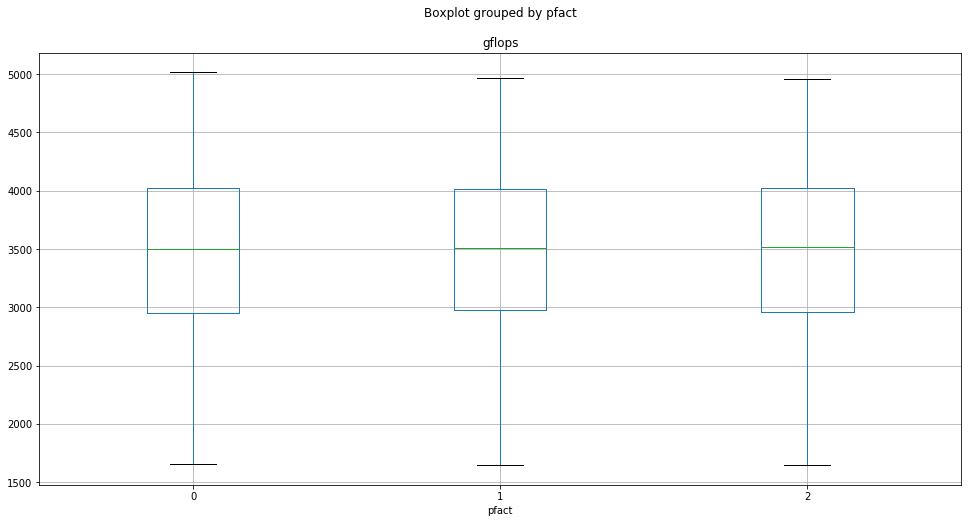

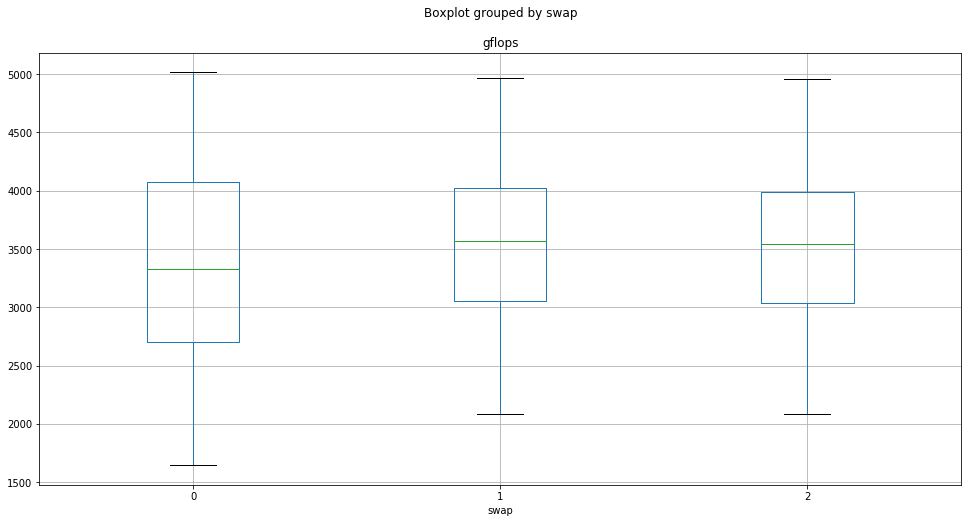

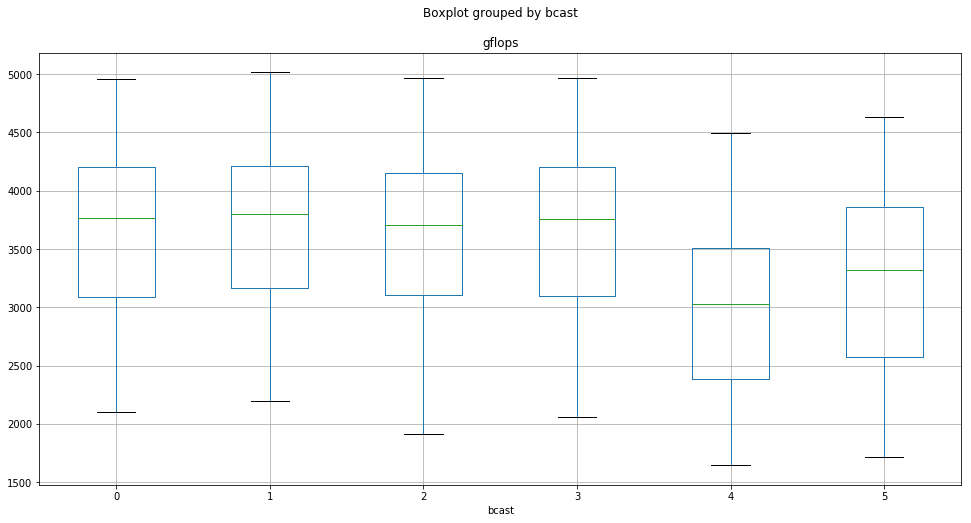

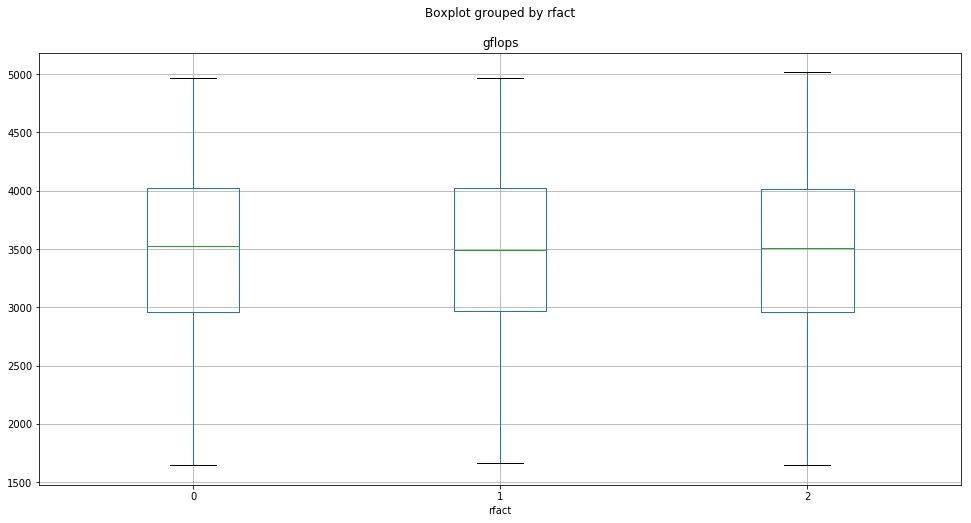

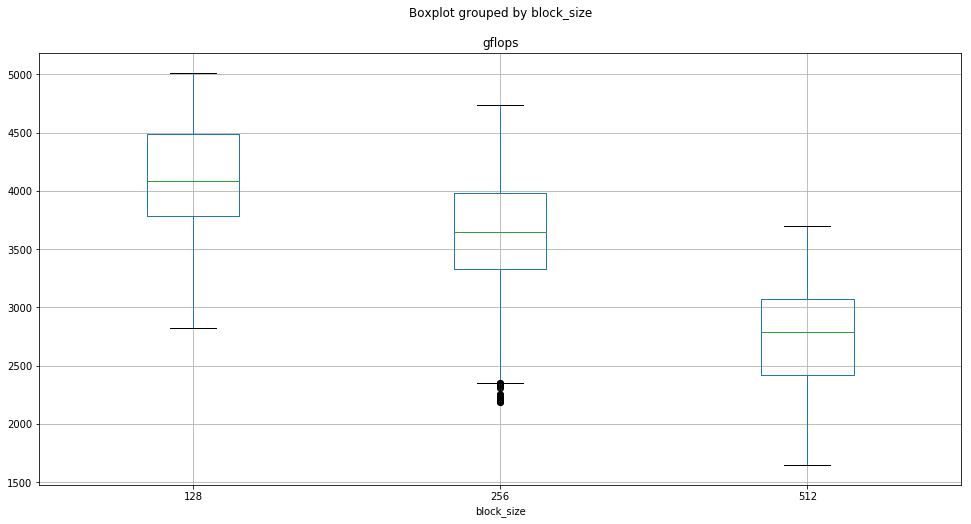

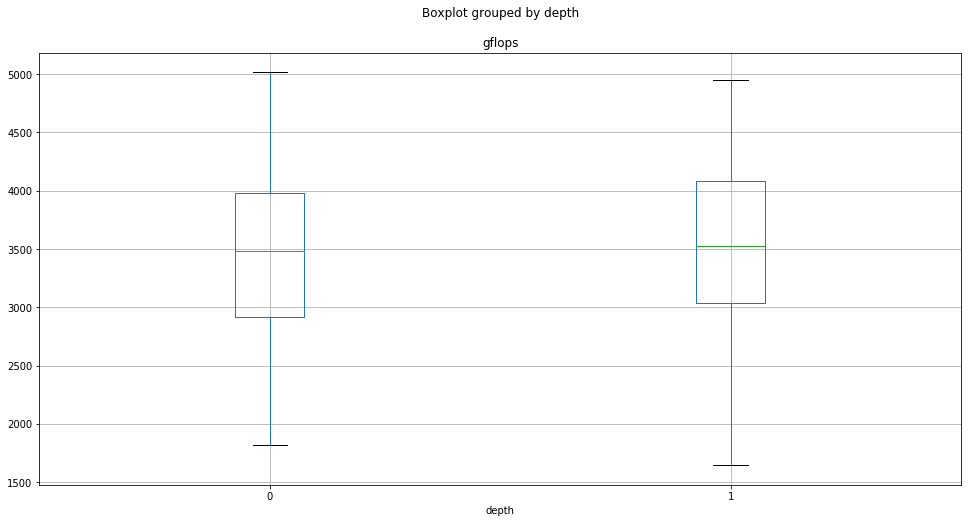

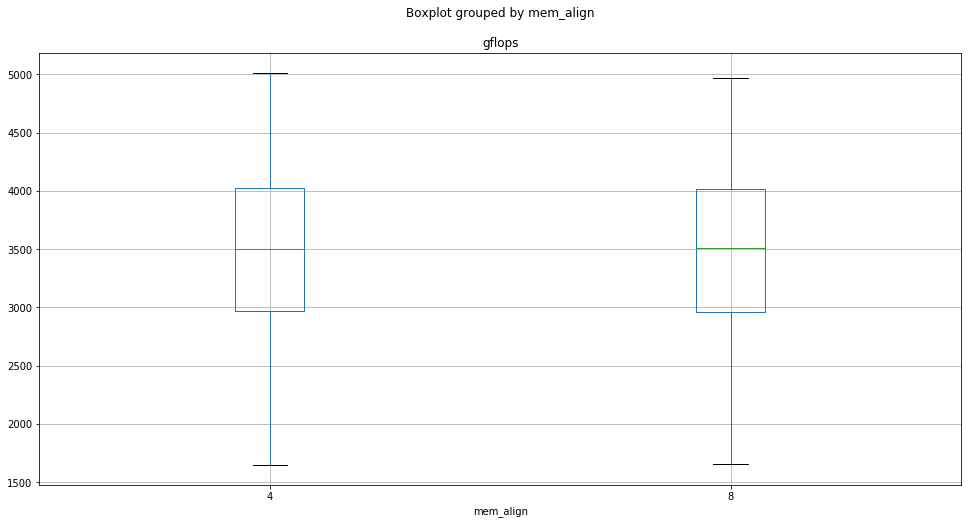

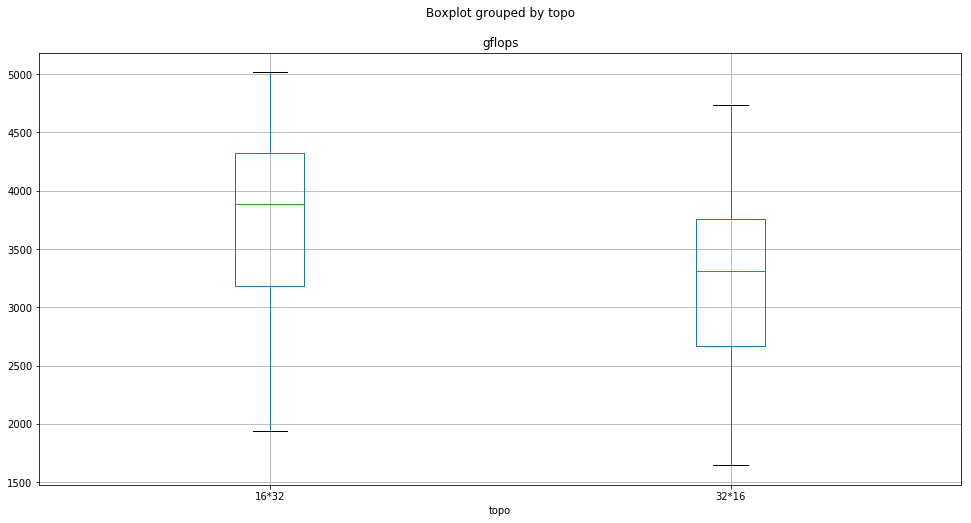

In [7]:
for fact in factors:
    df.boxplot(by=fact, column='gflops')

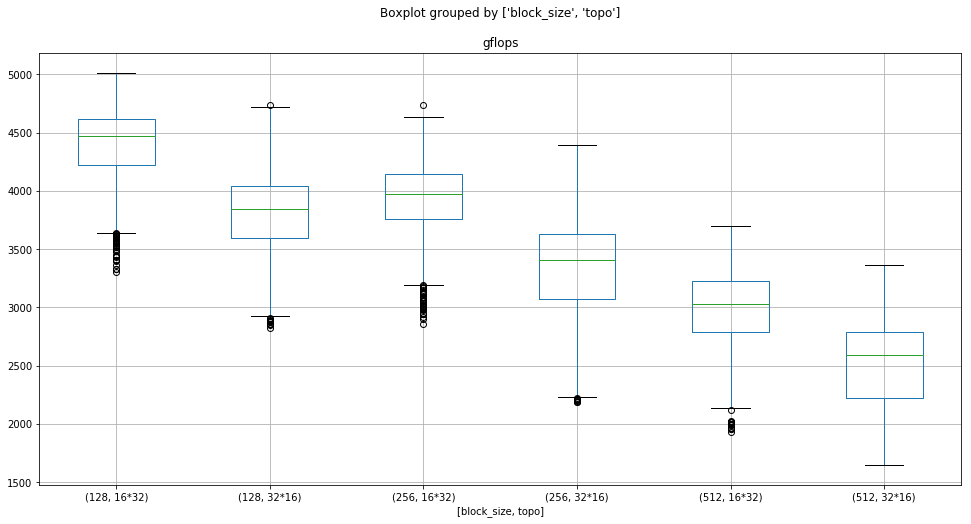

In [8]:
df.boxplot(by=['block_size', 'topo'], column='gflops')

Let's fix the `block_size` to 128 and the `topo` to 16*32.

In [9]:
df = df[(df.block_size == 128) & (df.topo == '16*32')]
print(len(df))
my_anova(df, factors, 'gflops')

648


,sum_sq,df,F,PR(>F),stars
C(pfact),1.800301e+04,2.0,0.471576,6.242616e-01,
C(swap),1.391002e+05,2.0,3.643632,2.676936e-02,*
C(bcast),6.253803e+07,5.0,655.255785,2.365296e-233,***
C(rfact),7.417984e+04,2.0,1.943089,1.442102e-01,
C(depth),1.542841e+06,1.0,80.827276,3.631123e-18,***
C(mem_align),1.286230e+04,1.0,0.673838,4.120606e-01,
C(pfact):C(swap),1.738136e+05,4.0,2.276463,5.987161e-02,.
C(pfact):C(bcast),3.216714e+05,10.0,1.685191,8.071201e-02,.
C(pfact):C(rfact),2.734120e+03,4.0,0.035809,9.975468e-01,
C(pfact):C(depth),3.355737e+04,2.0,0.879012,4.157561e-01,


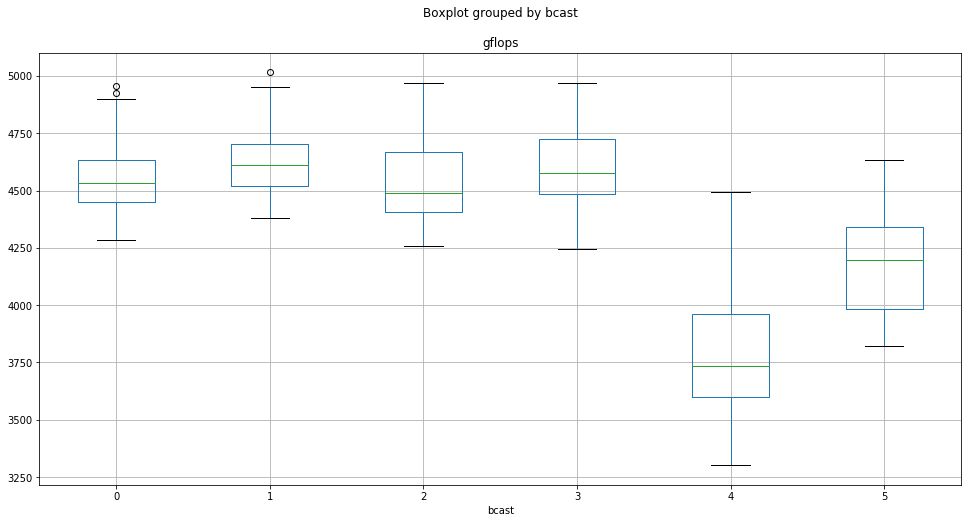

In [10]:
df.boxplot(by='bcast', column='gflops')

Take `bcast` in [0, 1, 2, 3].

In [11]:
df = df[df.bcast.isin([0, 1, 2, 3])]
print(len(df))
my_anova(df, factors, 'gflops')

432


,sum_sq,df,F,PR(>F),stars
C(pfact),3.001195e+04,2.0,0.912535,4.024045e-01,
C(swap),1.412342e+06,2.0,42.943257,1.676537e-17,***
C(bcast),4.737952e+05,3.0,9.604053,4.029223e-06,***
C(rfact),7.104217e+04,2.0,2.160088,1.167632e-01,
C(depth),2.508521e+03,1.0,0.152547,6.963376e-01,
C(mem_align),5.611687e+03,1.0,0.341255,5.594609e-01,
C(pfact):C(swap),1.507478e+05,4.0,2.291796,5.912860e-02,.
C(pfact):C(bcast),3.005146e+05,6.0,3.045786,6.398001e-03,**
C(pfact):C(rfact),5.380037e+04,4.0,0.817919,5.143218e-01,
C(pfact):C(depth),5.516768e+04,2.0,1.677412,1.882708e-01,


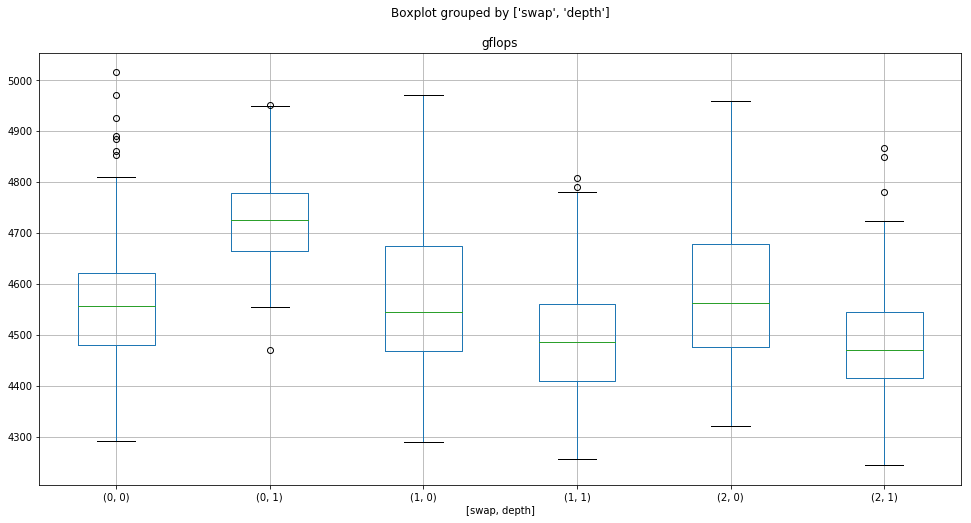

In [12]:
df.boxplot(by=['swap', 'depth'], column='gflops')

Now, take the `swap` 0 and the `depth` 1.

In [13]:
df = df[(df.swap == 0) & (df.depth == 1)]
print(len(df))
my_anova(df, factors, 'gflops')

72


,sum_sq,df,F,PR(>F),stars
C(pfact),99892.583333,2.0,5.463694,0.007983,**
C(bcast),83098.000000,3.0,3.030068,0.040369,*
C(rfact),19385.333333,2.0,1.060294,0.355886,
C(mem_align),490.888889,1.0,0.053699,0.817929,
C(pfact):C(bcast),53016.083333,6.0,0.966584,0.460070,
C(pfact):C(rfact),20363.333333,4.0,0.556893,0.695178,
C(pfact):C(mem_align),1397.694444,2.0,0.076448,0.926536,
C(bcast):C(rfact),62308.666667,6.0,1.136005,0.359485,
C(bcast):C(mem_align),2616.444444,3.0,0.095405,0.962135,
C(rfact):C(mem_align),1337.444444,2.0,0.073152,0.929583,


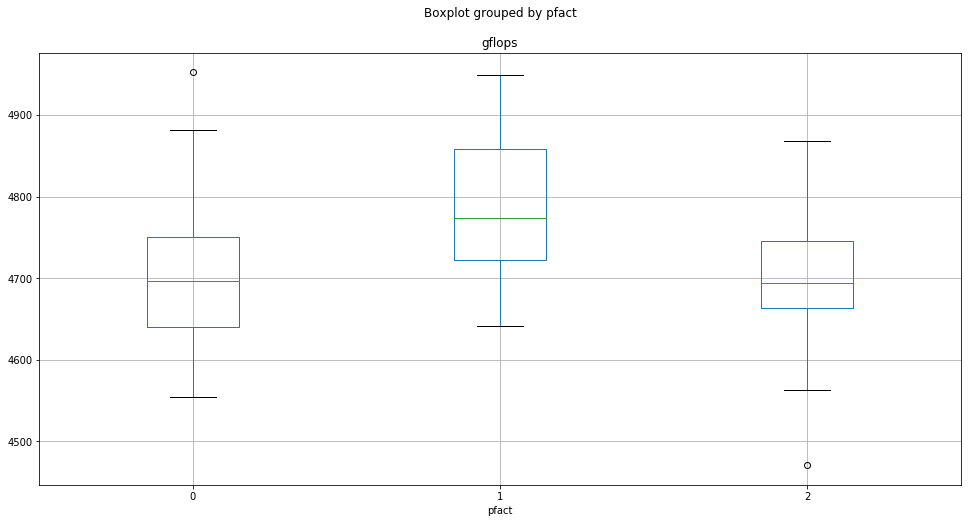

In [14]:
df.boxplot(by='pfact', column='gflops')

Take the `pfact` of 1.

In [15]:
df = df[df.pfact == 1]
print(len(df))
my_anova(df, factors, 'gflops')

24


,sum_sq,df,F,PR(>F),stars
C(bcast),63437.791667,3.0,3.171916,0.106444,
C(rfact),1304.333333,2.0,0.097826,0.908224,
C(mem_align),950.041667,1.0,0.142507,0.718794,
C(bcast):C(rfact),79320.333333,6.0,1.983025,0.212695,
C(bcast):C(mem_align),7955.458333,3.0,0.397776,0.759749,
C(rfact):C(mem_align),9564.333333,2.0,0.717331,0.525618,
Residual,39999.666667,6.0,NaN,NaN,


Let's stop here, no significant factor is found and we have too few points to keep going. Plotting the final result:

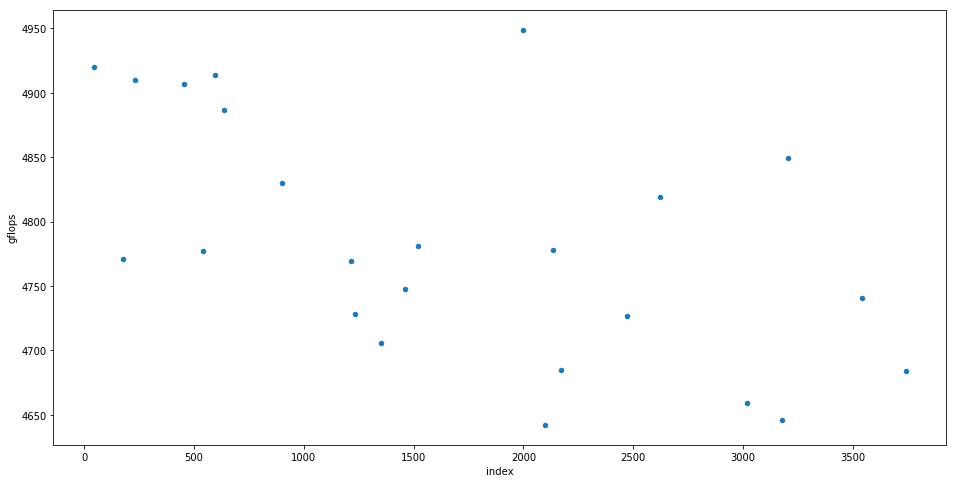

In [16]:
df.plot.scatter(x='index', y='gflops')

In [17]:
for fact in factors:
    print('%s: %s' % (fact, ', '.join(str(x) for x in sorted(df[fact].unique()))))

pfact: 1
swap: 0
bcast: 0, 1, 2, 3
rfact: 0, 1, 2
block_size: 128
depth: 1
mem_align: 4, 8
topo: 16*32
